# Imports

In [38]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [39]:
df_clean = pd.read_csv("data/df_log.csv")

In [40]:
np.random.seed(123)

In [41]:
df_clean

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN,outlier
0,2072,1.565728,3.604682,1.791759,7.524561,6.159095,7.242082,6.033086,0.393190,11.184421,0,1,0,0,0,0
1,10600,1.562134,3.516904,2.079442,7.616776,5.855072,6.759255,5.828946,1.933447,12.521248,1,0,0,0,0,0
2,2494,1.566337,3.600048,3.218876,6.774224,5.365976,6.836259,5.365976,0.440575,10.973357,0,1,0,0,0,0
3,4284,1.563057,3.529297,3.433987,6.432940,5.433722,6.391917,5.424950,0.424221,12.206073,1,0,0,0,0,0
4,16541,1.568134,3.632045,3.044522,7.561122,5.921578,7.029973,5.918894,1.406465,11.677592,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,1.569283,3.678577,2.995732,7.289611,5.627621,6.613384,5.521461,1.119232,11.448920,0,1,0,0,0,0
16508,18898,1.569879,3.640477,3.891820,7.768533,6.222576,7.030857,6.126869,0.960614,11.543455,0,0,0,1,0,1
16509,11798,1.568117,3.661508,2.944439,7.836370,6.133398,7.095064,6.061457,1.503144,12.168371,0,1,0,0,0,0
16510,6637,1.562738,3.531055,3.663562,7.928766,6.733402,7.842279,6.650279,0.945850,11.941456,1,0,0,0,0,0


# Feature engineering

## Pearson correlation 

We check the absolute value of the Pearson’s correlation between the target and numerical features in our dataset. We keep the top n features based on this criterion.

<AxesSubplot:>

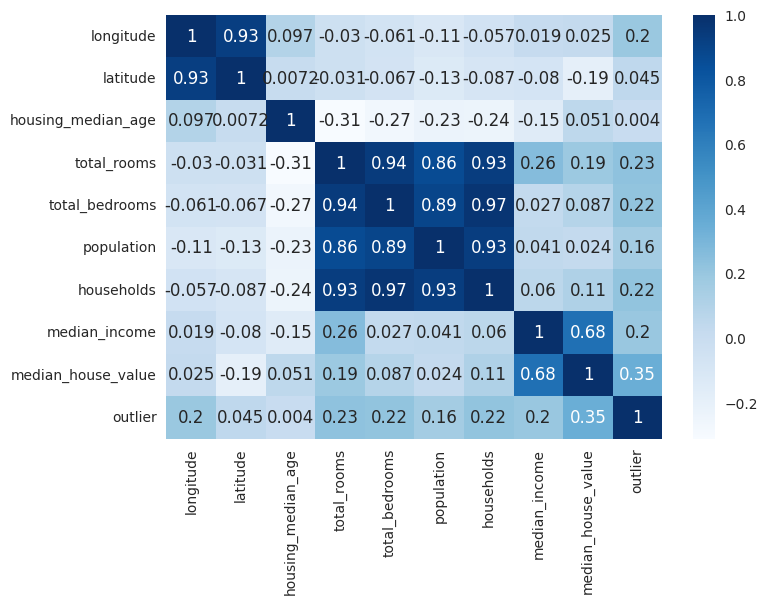

In [42]:
cor = df_clean.drop(["index", "_<1H OCEAN", "_INLAND", "_ISLAND","_NEAR BAY", "_NEAR OCEAN"], axis = 1).corr()
sns.heatmap(cor, annot=True, cmap = plt.cm.Blues
           )

In [43]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [44]:
X = df_clean.drop(["median_house_value"], axis = 1)
y = df_clean["median_house_value"]
num_feats = 9

In [45]:
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')
print("Selected feature:", cor_feature)

9 selected features
Selected feature: ['households', '_NEAR OCEAN', '_NEAR BAY', 'total_rooms', 'latitude', '_<1H OCEAN', 'outlier', '_INLAND', 'median_income']


Now I will drop the feature that are not selected

In [46]:
df_clean

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN,outlier
0,2072,1.565728,3.604682,1.791759,7.524561,6.159095,7.242082,6.033086,0.393190,11.184421,0,1,0,0,0,0
1,10600,1.562134,3.516904,2.079442,7.616776,5.855072,6.759255,5.828946,1.933447,12.521248,1,0,0,0,0,0
2,2494,1.566337,3.600048,3.218876,6.774224,5.365976,6.836259,5.365976,0.440575,10.973357,0,1,0,0,0,0
3,4284,1.563057,3.529297,3.433987,6.432940,5.433722,6.391917,5.424950,0.424221,12.206073,1,0,0,0,0,0
4,16541,1.568134,3.632045,3.044522,7.561122,5.921578,7.029973,5.918894,1.406465,11.677592,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,1.569283,3.678577,2.995732,7.289611,5.627621,6.613384,5.521461,1.119232,11.448920,0,1,0,0,0,0
16508,18898,1.569879,3.640477,3.891820,7.768533,6.222576,7.030857,6.126869,0.960614,11.543455,0,0,0,1,0,1
16509,11798,1.568117,3.661508,2.944439,7.836370,6.133398,7.095064,6.061457,1.503144,12.168371,0,1,0,0,0,0
16510,6637,1.562738,3.531055,3.663562,7.928766,6.733402,7.842279,6.650279,0.945850,11.941456,1,0,0,0,0,0


In [47]:
df = df_clean.drop(["index"], axis = 1)

# PCA 

I drop my target, PCA doesn't need it

In [48]:
X_log = df.drop(["median_house_value"], axis = 1)
y_log = df["median_house_value"]

I look at the shape of my dataframe

In [49]:
shape = X_log.values

In [50]:
shape.shape

(16512, 14)

I apply with the original number of dimension and see how well PCA capture the variance of the data

In [51]:
from sklearn.decomposition import PCA

pca_14 = PCA(n_components = 14, random_state = 2020)
pca_14.fit(X_log)
X_pca_14 = pca_14.transform(X_log)

In [52]:
print("Variance expalined by all 14 principal component=",
     sum(pca_14.explained_variance_ratio_ * 100))

Variance expalined by all 14 principal component= 99.99999999999997


In [53]:
pca_14.explained_variance_ratio_ * 100

array([5.78684411e+01, 1.15812242e+01, 1.03738933e+01, 8.50802816e+00,
       4.82131489e+00, 3.16326924e+00, 1.83624210e+00, 1.05079648e+00,
       4.44667317e-01, 2.81606543e-01, 6.22046802e-02, 8.29585972e-03,
       1.62415531e-05, 2.87968597e-31])

I create a plot

Text(0, 0.5, 'Explained variance')

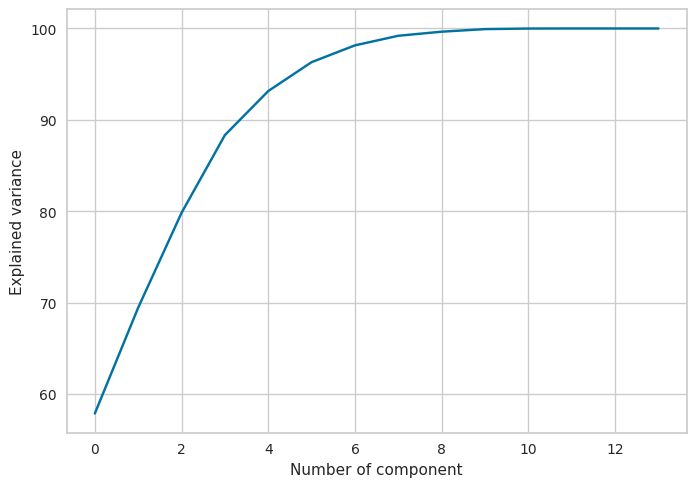

In [54]:
plt.plot(np.cumsum(pca_14.explained_variance_ratio_ * 100))
plt.xlabel("Number of component")
plt.ylabel("Explained variance")

Apply PCA with 12 components

In [55]:
pca_12 = PCA(n_components = 12, random_state = 2020)
pca_12.fit(X_log)
X_pca_12 = pca_12.transform(X_log)

Apply PCA with 8 components

In [56]:
pca_8 = PCA(n_components = 8, random_state = 2020)
pca_8.fit(X_log)
X_pca_8 = pca_8.transform(X_log)

In [57]:
print("Variance expalined by all 14 principal component=",
     sum(pca_8.explained_variance_ratio_ * 100))

Variance expalined by all 14 principal component= 99.2032093582073


Apply PCA with 6 components

In [58]:
pca_6 = PCA(n_components = 6, random_state = 2020)
pca_6.fit(X_log)
X_pca_6 = pca_6.transform(X_log)

Apply PCA with 2 components

In [59]:
pca_2 = PCA(n_components = 2, random_state = 2020)
pca_2.fit(X_log)
X_pca_2 = pca_2.transform(X_log)

Apply PCA with 3 components

In [60]:
pca_3 = PCA(n_components = 3, random_state = 2020)
pca_3.fit(X_log)
X_pca_3 = pca_3.transform(X_log)

In [61]:
print("Variance expalined by 3 principal component=",
     sum(pca_3.explained_variance_ratio_ * 100))

Variance expalined by 3 principal component= 79.82355848450898


I plot a scatterplot of the 2 first principal component

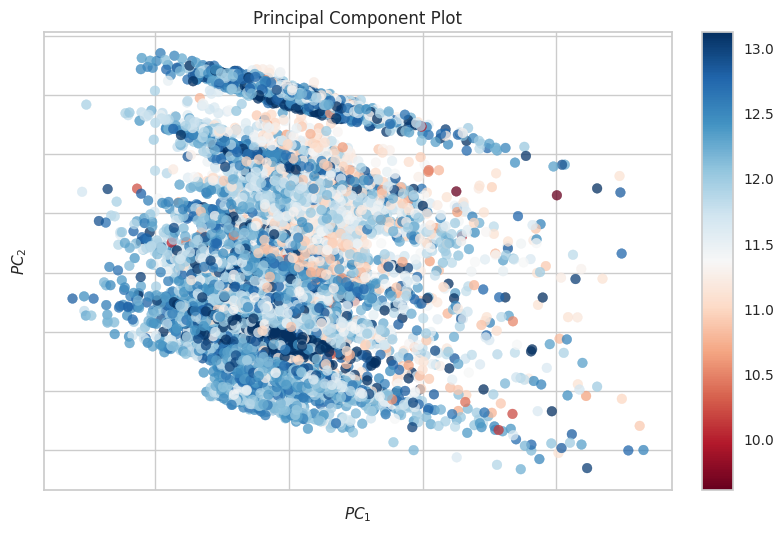

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [62]:
from yellowbrick.features import PCA

visualizer_2 = PCA(scale = True, projection = 2,
                  classes = ["PC1", "PC2"],
                   random_state = 2020,
                   colors = ["red", "blue"])

visualizer_2.fit_transform(X_log, y_log)
visualizer_2.show()

I plot a 3d_scatter plot of the 3 first PCA component

/home/selmane/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/yellowbrick/features/pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


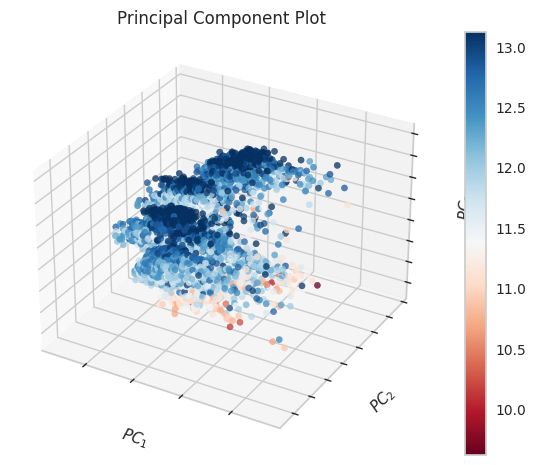

<Axes3DSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [63]:
visualizer_3 = PCA(scale = True, projection = 3,
                  classes = ["PC1", "PC2"],
                   random_state = 2020,
                   colors = ["red", "blue"])

visualizer_3.fit_transform(X_log, y_log)
visualizer_3.show()

Text(0.5, 0, 'Third principal component')

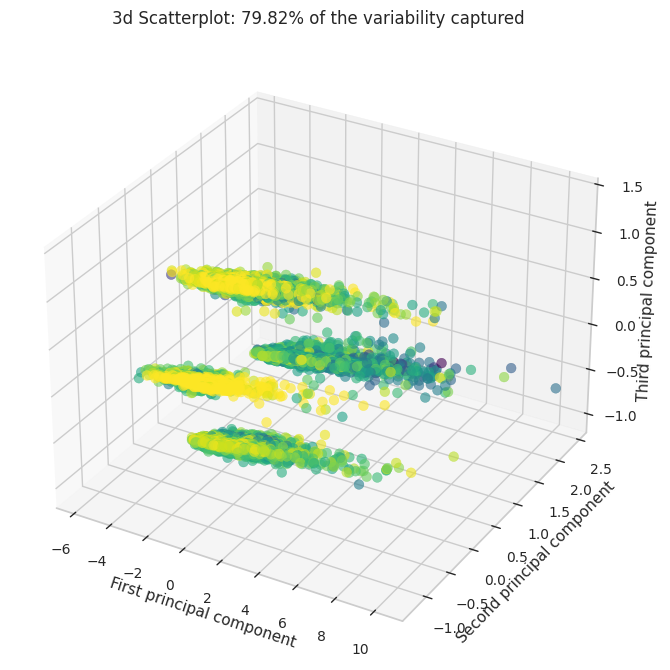

In [64]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (12, 8))
ax = plt.axes(projection = "3d")

sctt = ax.scatter3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2],
                   c = y_log, cmap='viridis', s = 50, alpha = 0.6)

plt.title("3d Scatterplot: 79.82% of the variability captured", pad = 15)
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
ax.set_zlabel("Third principal component")

## I will apply PCA by setting n_components = 0.95 (95% of the variability)

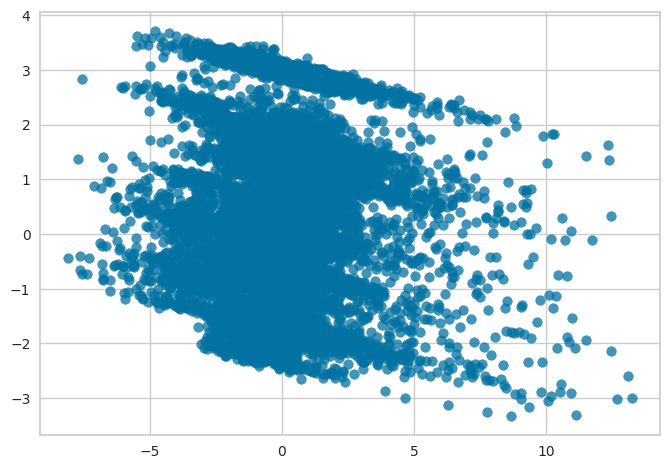

In [65]:
pca_95 = PCA(n_components = 0.95, random_state = 2020)
pca_95.fit(X_log)
X_pca_95 = pca_95.transform(X_log)

In [66]:
X_pca_95.shape

(16512, 2)

This means that the algorithm has found 10 principal components to preserve 95% of the variability in the data.

## Lets create a dataframe 

In [67]:
df_pca_95 = pd.DataFrame(X_pca_95, columns = ["PC1", "PC2"])

df_pca_95["median_house_value"] = df["median_house_value"]
df_pca_95.head()

,PC1,PC2,median_house_value
0,-0.110292,0.640458,11.184421
1,-0.262338,-1.972427,12.521248
2,2.012216,0.471859,10.973357
3,2.010325,-1.860370,12.206073
4,0.515469,1.158264,11.677592


In [68]:
df_pca_6 = pd.DataFrame(X_pca_6, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"])

df_pca_6["median_house_value"] = df["median_house_value"]
df_pca_6.head()

,PC1,PC2,PC3,PC4,PC5,PC6,median_house_value
0,-0.217512,1.555318,-0.541312,0.210121,0.868900,0.278600,11.184421
1,0.148333,-0.105161,-0.704247,1.366718,0.161548,0.118823,12.521248
2,1.250630,0.910348,-0.255817,-0.622149,0.285923,0.034803,10.973357
3,1.557805,-0.378121,-0.579612,-0.497278,0.771396,0.153111,12.206073
4,0.151223,0.780865,-0.192030,0.025062,-0.414167,-0.092014,11.677592


In [69]:
df_pca_8 = pd.DataFrame(X_pca_8, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"])

df_pca_8["median_house_value"] = df["median_house_value"]
df_pca_8.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,median_house_value
0,-0.217512,1.555318,-0.541312,0.210121,0.868900,0.278600,0.109041,-0.087914,11.184421
1,0.148333,-0.105161,-0.704247,1.366718,0.161548,0.118823,-0.061592,-0.196369,12.521248
2,1.250630,0.910348,-0.255817,-0.622149,0.285923,0.034803,0.375271,0.069853,10.973357
3,1.557805,-0.378121,-0.579612,-0.497278,0.771396,0.153111,-0.074783,0.041791,12.206073
4,0.151223,0.780865,-0.192030,0.025062,-0.414167,-0.092014,0.181870,-0.048277,11.677592


In [70]:
df_pca_12 = pd.DataFrame(X_pca_12, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PCA9", "PCA10", "PCA11", 
                                              "PC12"])

df_pca_12["median_house_value"] = df["median_house_value"]
df_pca_12.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PCA9,PCA10,PCA11,PC12,median_house_value
0,-0.217512,1.555318,-0.541312,0.210121,0.868900,0.278600,0.109041,-0.087914,0.047057,0.027473,0.007477,0.000749,11.184421
1,0.148333,-0.105161,-0.704247,1.366718,0.161548,0.118823,-0.061592,-0.196369,-0.075686,0.013691,-0.028484,0.000733,12.521248
2,1.250630,0.910348,-0.255817,-0.622149,0.285923,0.034803,0.375271,0.069853,0.045869,0.022989,0.005759,0.000192,10.973357
3,1.557805,-0.378121,-0.579612,-0.497278,0.771396,0.153111,-0.074783,0.041791,-0.166605,0.007080,-0.007568,-0.000404,12.206073
4,0.151223,0.780865,-0.192030,0.025062,-0.414167,-0.092014,0.181870,-0.048277,-0.119081,-0.015691,0.034563,0.000740,11.677592


## Conclusion

PCA dosn't improve the accuracy of my model neither my RMSE, so I'll not use this tools

# Export the data

In [71]:
df_export = df_pca_8.to_csv(r'data/df.csv', index=False)